## 選定特徵

### 使用特徵分別為
1. PClass
2. Age
3. Sex
4. PClass + Age
5. PClass + Sex
6. Age + Sex
7. PClass + Age + Sex

選用特徵值為加快執行速度，K值僅使用1-100  
並且為了避免在二分時出現問題所以避開偶數  
EX: 假設K=4，鄰居A,B屬於類別1，鄰居C,D屬於類別2，這種情況就會分不出預測樣本的類別

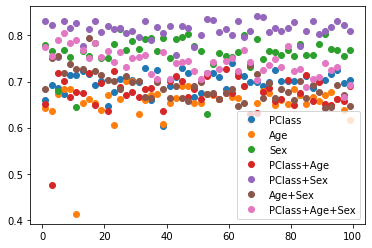

In [53]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))


labelencoder = LabelEncoder()
data = pd.read_csv("titanic.csv")

df = data[:1282]

df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)

df["Age"] = df["Age"].fillna(df["Age"].median()) #將資料缺失(nan)用年齡的平均值補起來
df.Sex.replace(['male', 'female'], [1,0], inplace=True)
df['PClass'] = labelencoder.fit_transform(df['PClass'])

#各種特徵組合
X0 = np.array(df.filter(['PClass'], axis=1))
X1 = np.array(df.filter(['Age'], axis=1))
X2 = np.array(df.filter(['Sex'], axis=1))
X3 = np.array(df.filter(['PClass','Age'], axis=1))
X4 = np.array(df.filter(['PClass','Sex'], axis=1))
X5 = np.array(df.filter(['Age','Sex'], axis=1))
X6 = np.array(df.filter(['PClass','Age', 'Sex'], axis=1))
X = [X0, X1, X2, X3, X4, X5, X6]

y = np.array(df.filter(['Survived'], axis=1))

P_x = np.arange(1, 100, 2).tolist()

for i in range(7):
    #print(f"now doing:X{i}")
    value = []
    for j in range(1, 100, 2):
        train_data, test_data, train_label, test_label = train_test_split(X[i], y.ravel(), test_size = 0.3)
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(train_data, train_label)
        value.append(knn.score(test_data, test_label))

    plt.plot(P_x, value, 'o', label=f'X{i}')
    plt.legend(loc="lower right")

plt.legend(['PClass', 'Age', 'Sex', 'PClass+Age', 'PClass+Sex', 'Age+Sex', 'PClass+Age+Sex'])
plt.show()

## 選定特徵為 PClass + Sex
從上方的點圖可以看出最好的特徵為 PClass + Sex  
因此直接從PClass + Sex的特徵開始找K值跟預測正確性
---

## 找最適合的K值、最佳的預測正確性。

在我的程式碼中，原先使用1-500的K值來做KNN，測試後發現大概從150開始準確率就會下降，且若迴圈執行1-500，執行時間也會過久。  
因此我最後將K值設定成1-150，並且跳過偶數，避免在二分時出現問題

程式會將Age資料缺失的部分用中位數補上，並且將Male, Female改成1, 0，並且使用Label encoding將PClass做資料前處理。  

每執行一個不同的K值，都執行50次取平均，因為每次訓練取的70%資料都不同，訓練50次再取平均會使結果較為穩定。

max accuracy： 0.8207792207792208
K值： 71


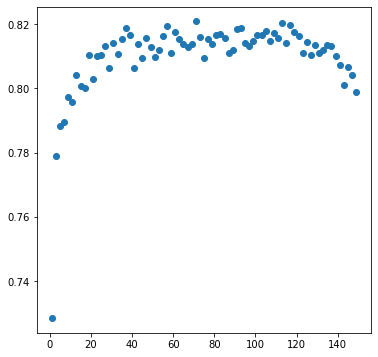

In [54]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

labelencoder = LabelEncoder()
data = pd.read_csv("titanic.csv")

df = data[:1282]

df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)

df["Age"] = df["Age"].fillna(df["Age"].median()) #將資料缺失(nan)用年齡的中位數補起來
df.Sex.replace(['male', 'female'], [1,0], inplace=True)
df['PClass'] = labelencoder.fit_transform(df['PClass'])

X = np.array(df.filter(['PClass','Sex'], axis=1))
y = np.array(df.filter(['Survived'], axis=1))

P_x = np.arange(1, 150, 2).tolist()

value = []
for j in range(1, 150, 2):
    avg = 0
    for k in range(50):
        train_data, test_data, train_label, test_label = train_test_split(X, y.ravel(), test_size = 0.3)
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(train_data, train_label)
        avg += knn.score(test_data, test_label)
    value.append(avg / 50)
    #print(f"K = {j}, predictive accuracy = ", avg/50)

max_accuracy = max(value)
max_index = value.index(max_accuracy)
best_k = P_x[max_index]

print("max accuracy：", max_accuracy)
print("K值：", best_k)   

plt.plot(P_x, value, 'o')
plt.show()

## 結果

從上方程式取得的資料
- 較適合預測的特徵為：<font color=Red>PClass + Sex</font>
- 最適合的K值為：<font color=Red>71</font>
- 最佳的預測正確性：<font color=Red>0.8207792207792208</font>